In [5]:
### we start by importing all the needed libraries for running machine learning in python.
### This is my first model for linear regression and i am starting learning on how to interpret 
### the graphs while building machine learing model.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
df = pd.read_csv('boston-housing.csv')

In [ ]:
### We start by importing dataset in notebook

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
### The head() function generate the top 5 rows for the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [10]:
### The info function generate the overview of all the columns, the number of entries, the data types, 
### names of the columns and the information on the null values hence we do not have the null values in our dataset

In [11]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [23]:
### This gives us a summary of all the indicators at all the columns
### The target columns is the medv, which is the median value of the house in dollars

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

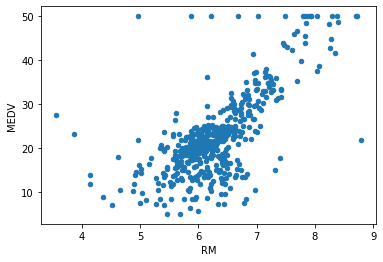

In [24]:
df.plot.scatter('RM', 'MEDV')

In [25]:
### From the above graph graph, there is a pattern between number of rooms and 
### the median value(MEDV) of the house increase as the number of rooms increse(RM)

<AxesSubplot:>

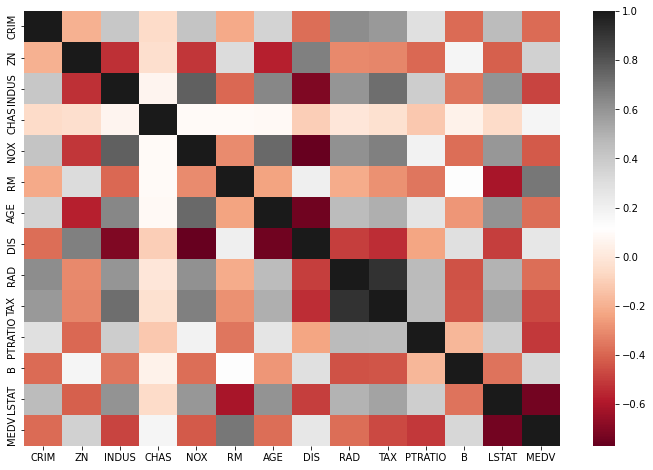

In [27]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy')

In [28]:
### From the above graph, the more red the color, the smaller medv, hence negative correlation
### The more the right color, the variables have no correlation, hence zero correlation.
### The gray color and black, the higher the value of medv, hence positive correlation

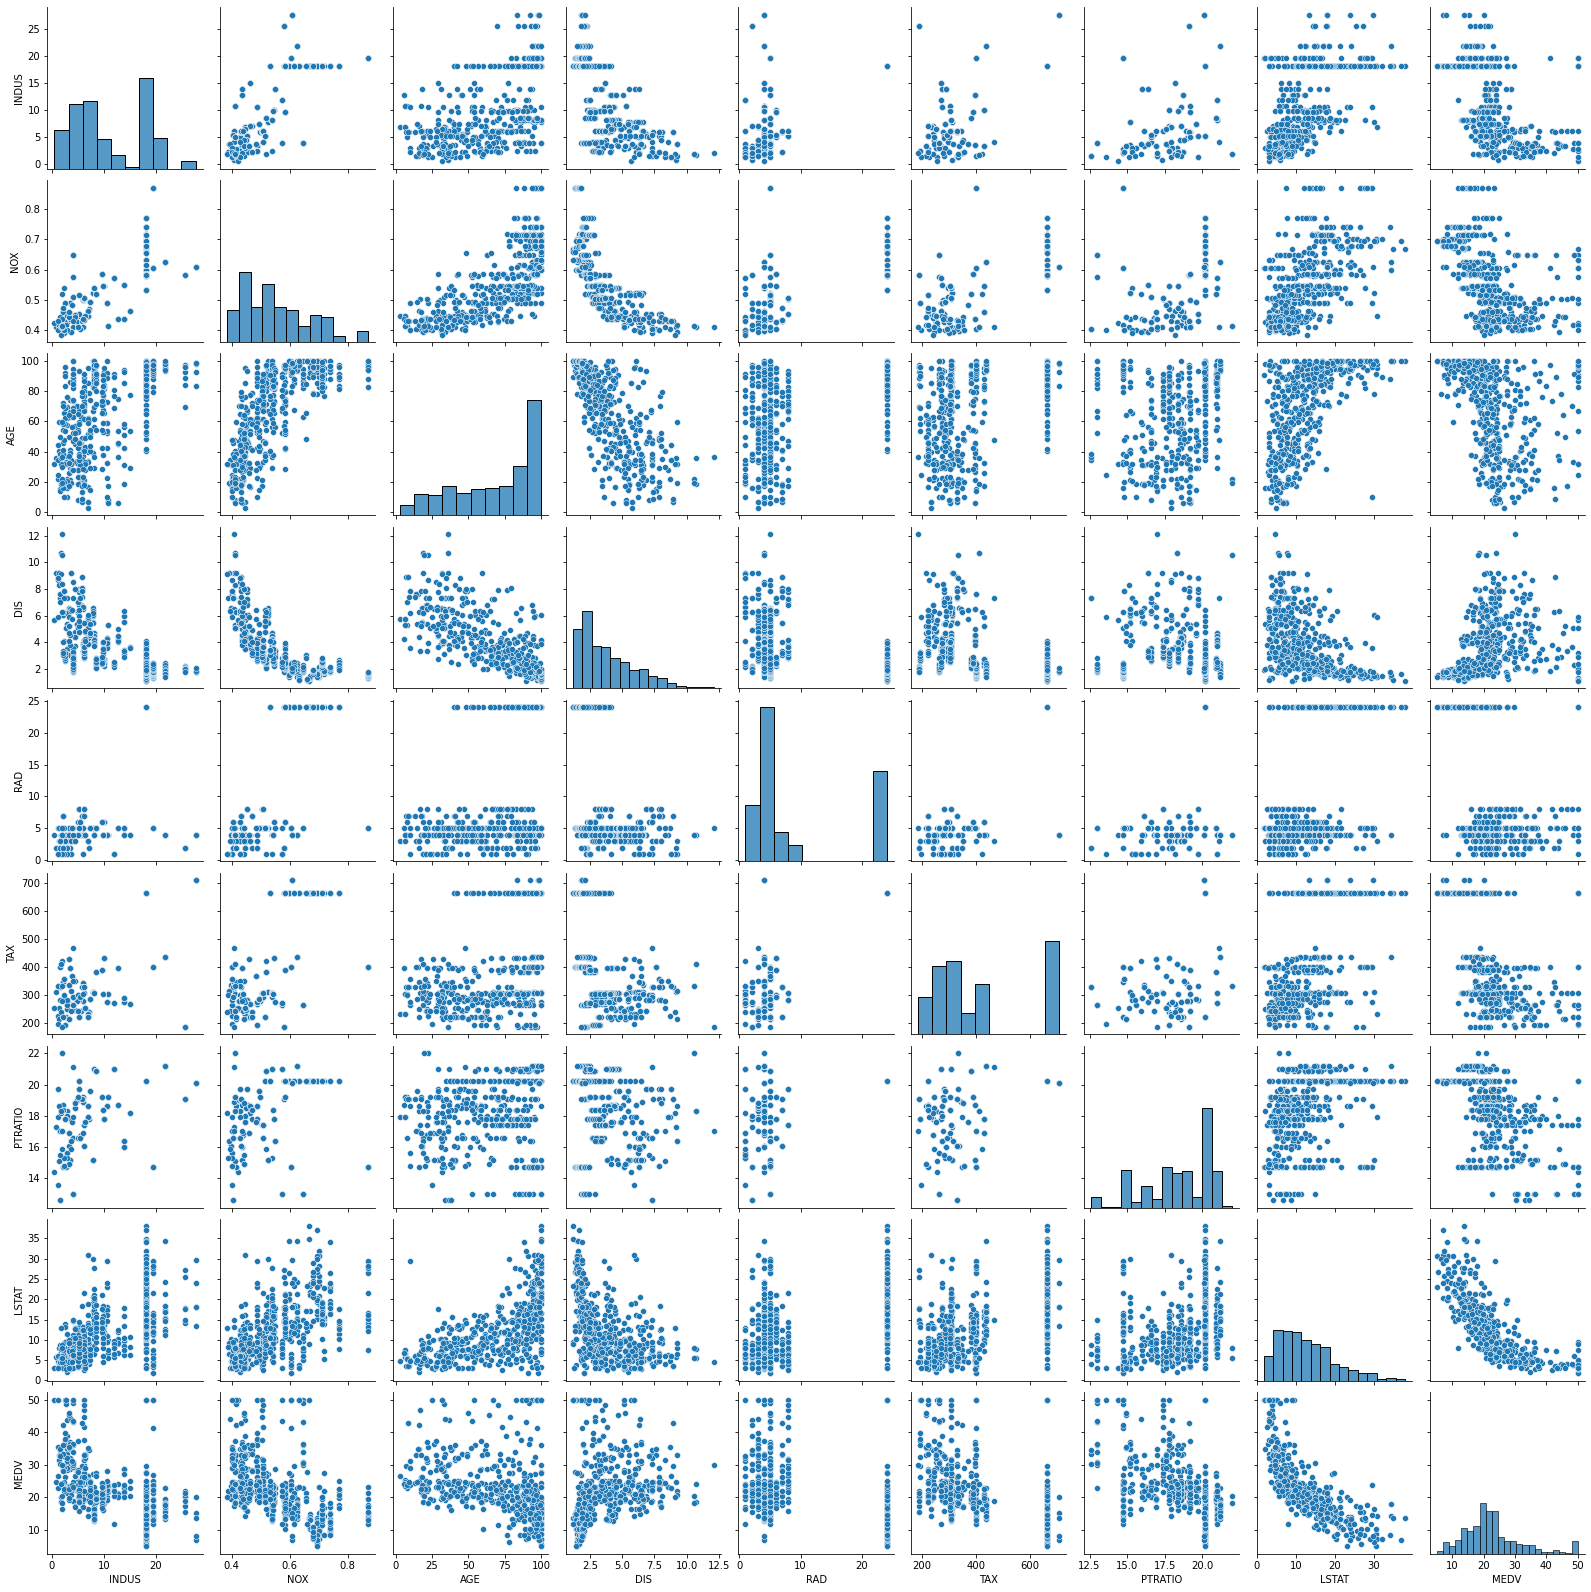

In [31]:
sns.pairplot(df, vars = ['INDUS','NOX','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV' ])

In [32]:
### Zero correlation: When x and y are completely independent
### Positive Correlation: When x and y go together to the right more independent

In [34]:
# Training a linear Regression Model, Defining x and y
# x: Variable named as predictors, independent variable or feature
# y: Variable named response or dependent variable

In [38]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

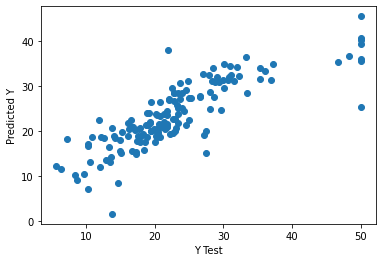

In [43]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.7153710155288415
MSE: 27.13123983734614
RMSE: 5.2087656731077985


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


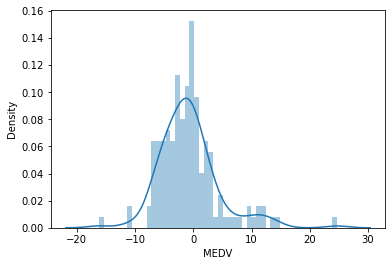

In [49]:
sns.distplot((y_test-predictions),bins=50);

In [50]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.115090
ZN,0.056264
INDUS,-0.044639
CHAS,3.284101
NOX,-17.053970
RM,3.661394
AGE,-0.002189
DIS,-1.574675
RAD,0.274344
TAX,-0.008776


In [53]:
# For one unit that NOX increase, the house value decrease 'NOX'*1000 (Negative correlation) money unit.
# For one unit that RM increase, the house value increase 'RM'*1000 (Positive correlation) money unit.

In [ ]:
#### END